In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Feedforward: Building a ReLU neural network

## 1.Draw a network 

![title](hw2.jpg)

## 2. Write out the mathematical equation for the output of this network

$$h1 = f(w_{11} x_1 + w_{21} x_2 + b_1) = max(0, w_{11} x_1 + w_{21} x_2 + b_1)$$
$$h2 = f(w_{12} x_1 + w_{22} x_2 + b_2) = max(0, w_{12} x_1 + w_{22} x_2 + b_2)$$
$$h3 = f(w_{13} x_1 + w_{23} x_2 + b_3) = max(0, w_{13} x_1 + w_{23} x_2 + b_3)$$
$$h4 = f(w_{14} x_1 + w_{24} x_2 + b_4) = max(0, w_{14} x_1 + w_{24} x_2 + b_4)$$

$$ y = g(v_1h1 + v_2h2 + v_3 h3 + v_4h4 +c)$$
$$ y = \frac{1} {1+e^{-(v_1h1 + v_2h2 + v_3 h3 + v_4h4 +c)}}$$

## 3 . Write out the forward-pass function in python

In [87]:
def ff_nn_Relu(x,w,b):
    z=np.dot(w,x)
    return tf.nn.relu(z)    

In [103]:
def ff_nn_out(x,w,b,v,c):
    h = ff_nn_Relu(x,w,b)
    return tf.nn.sigmoid(np.dot(v,h)+c)

## 4. what are the class probabilities associated with the forward pass of each sample?

In [216]:
x = np.array([[1.0,0.0,0.0],[-1.0,-1.0,1.0]])
w = np.array([[1,0],[-1,0],[0,0.5],[1,1]])
b = np.array([[0,0,1,0]]).T
v =np.array([[1,0,-1,1]])
c = [1]

In [102]:
ff_nn_out(x,w,b,v,c)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.88079708, 0.73105858, 0.81757448]])>

In [104]:
## the probabilities of each sample is 0.88, 0.73, 0.82.

# Gradient Descent

## 1 . The partial derivatives for x is :  $f =-3 x^2  +100 x -200y^2$

##  The partial derivatives for y is :  $f = 800 y^3 - 400xy$

# 2.Create a visualization of the contours of this function.

In [2]:
def f(x,y):
    return (3-x**3)+ 50*(2*y**2 - x**2)**2

In [3]:
x = np.arange(-5,5,0.01)
y = np.arange(-5,5,0.01)
X,Y = np.meshgrid(x,y)
Z=f(X,Y)

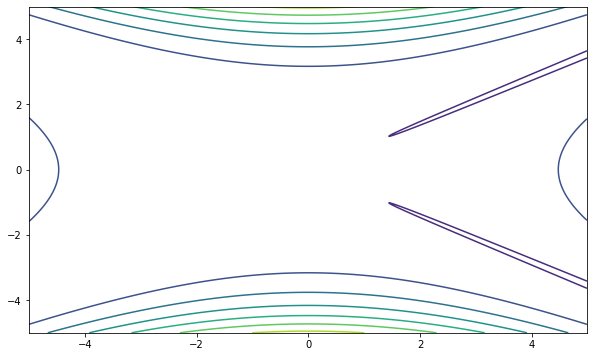

In [4]:
plt.figure(figsize=(10,6))
plt.contour(X,Y,Z)
#This plot shows the contours of the function.

# 3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.


In [5]:
def grad_f(a): 
    x,y = a
    df_dx = -3*x**2 + 100*x -200*y**2
    df_dy = 800*y**3 - 400*x*y
    return np.array([df_dx, df_dy])

In [6]:
def grad_descent(starting_point=None, iterations=10,learning_rate = 1):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    for i in range(iterations):
        grad = grad_f(point)
        point = point-learning_rate*grad
        trajectory.append(point)
    return np.array(trajectory)

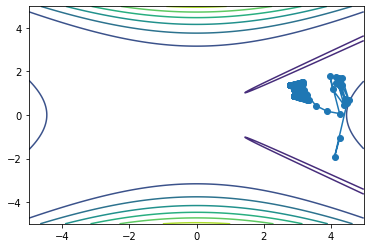

In [36]:
traj = grad_descent(iterations=100000,learning_rate = 0.001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

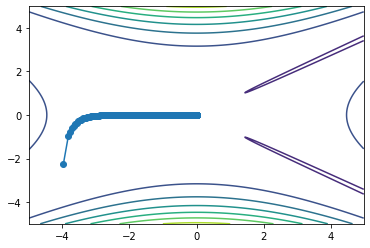

In [37]:
traj = grad_descent(iterations=100000,learning_rate = 0.0001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

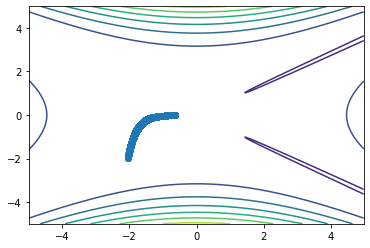

In [31]:
traj = grad_descent(iterations=10000,learning_rate = 0.000001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# 4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm’s hyperparameters.

In [38]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point is None:
        point = np.random.uniform(-5,5,size=2)
    else:
        point = starting_point
    trajectory = [point]
    v = np.zeros(point.size)
    for i in range(iterations): 
        v = v*alpha + grad_f(point)*epsilon
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

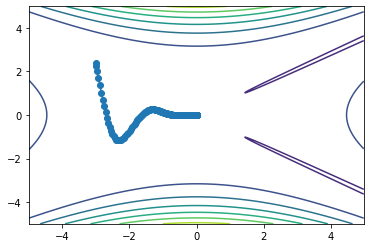

In [54]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.9,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

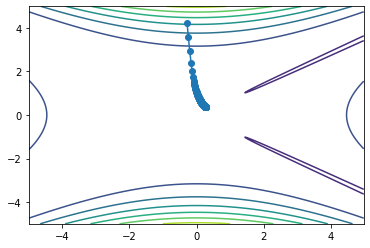

In [51]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.5,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

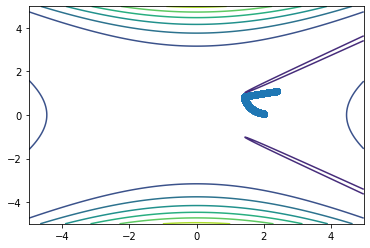

In [60]:
traj = grad_descent_with_momentum(iterations=10000,alpha=0.1,epsilon=0.00001)
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

# Backprop

## 1. For the same network as in Question 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

$$ Loss = -y_i \cdot log(\hat{y_i}) - (1-y_i) \cdot log(1-\hat{y_i})$$


$$Set\ z =v_1h1 + v_2h2 + v_3 h3 + v_4h4 +c$$
$$ \frac{\sigma L}{\sigma c} = ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot \frac{e^{-z}} {(1+e^{-z})^2}   $$
$$  \frac{\sigma L}{\sigma v1}   =   ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot h1   $$
$$  \frac{\sigma L}{\sigma v2}   =   ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot h2   $$
$$  \frac{\sigma L}{\sigma v3}   =   ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot h3   $$
$$  \frac{\sigma L}{\sigma v4}   =   ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot h4   $$

$$ when\ wx+b > 0: $$
$$  \frac{\sigma L}{\sigma b_1}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_1 $$
$$  \frac{\sigma L}{\sigma b_2}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_2 $$
$$  \frac{\sigma L}{\sigma b_3}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_3 $$
$$  \frac{\sigma L}{\sigma b_4}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_4 $$

$$ \frac{\sigma L}{\sigma w_{11}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_1 x_1 $$
$$ \frac{\sigma L}{\sigma w_{12}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_2 x_1 $$
$$ \frac{\sigma L}{\sigma w_{13}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_3 x_1 $$
$$ \frac{\sigma L}{\sigma w_{14}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_4 x_1 $$
$$ \frac{\sigma L}{\sigma w_{21}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_1 x_2 $$
$$ \frac{\sigma L}{\sigma w_{22}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_2 x_2 $$
$$ \frac{\sigma L}{\sigma w_{23}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_3 x_2 $$
$$ \frac{\sigma L}{\sigma w_{24}}  =  ( \frac{y}{\hat{y_i}} +  \frac{1-y}{1-\hat{y_i}} ) \cdot    \frac{e^{-z}} {(1+e^{-z})^2} \cdot v_4 x_2 $$

## 2 .Write a function grad f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [2]:
def ff_nn_new(X,params):
    h = tf.nn.relu(tf.matmul(params[0],X)+params[1])
    return tf.nn.sigmoid(tf.matmul(params[2],h)+params[3])
loss = tf.keras.losses.BinaryCrossentropy()

In [3]:
def grad_f(X,Y,params):
    with tf.GradientTape() as tape:
        y_hat = ff_nn_new(X,params)
        f = loss(Y,y_hat)
    print(tape.gradient(f,params))

In [63]:
W = tf.random.uniform((4, 2), minval=-1, maxval=1)
B = tf.random.uniform((4, 1), minval=-1, maxval=1)
V = tf.random.uniform((1, 4), minval=-1, maxval=1)
C = tf.random.uniform((1,), minval=-1, maxval=1)
X = tf.random.uniform((2,3), minval=-2, maxval=2)
Y = tf.constant([0,0,1])
params = [tf.Variable(p) for p in [W,B,V,C]]

In [64]:
 grad_f(X,Y,params)

[<tf.Tensor: shape=(4, 2), dtype=float32, numpy=
array([[-0.18082313, -0.10410465],
       [ 0.        ,  0.        ],
       [-0.04143259, -0.06840168],
       [ 0.        ,  0.        ]], dtype=float32)>, <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.04231904],
       [ 0.        ],
       [-0.22401614],
       [ 0.        ]], dtype=float32)>, <tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[-0.01452381,  0.        ,  0.12385802,  0.        ]],
      dtype=float32)>, <tf.Tensor: shape=(1,), dtype=float32, numpy=array([0.25949508], dtype=float32)>]


## 3. Generate a synthetic dataset like the XOR pattern (see below).

In [364]:
def binary_classification_data(N):
  X = np.random.uniform(low=-2, high=2, size=(N, 2)).astype(np.float32)
  Y = (X[:, 0] * X[:, 1] > 0).astype(np.int)
  return X,Y

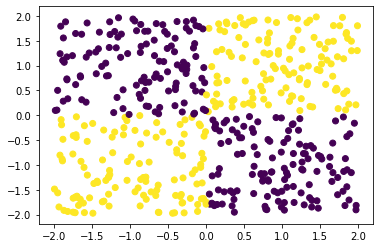

In [365]:
X,Y = binary_classification_data(500)
plt.scatter(X[:, 0],X[:, 1],c=Y)

## 4.Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [366]:
def grad_step(X,Y,params,step_size):
  with tf.GradientTape() as tape:
        y_hat = ff_nn_new(X,params)
        f = loss(Y,y_hat)
  grads = tape.gradient(f,params)
  for var,grad in zip(params,grads):
        var.assign(var - step_size*grad)
  return f

In [367]:
def grad_desc(X,Y,params,step_size,n_iters):
    X = tf.Variable(X.T)
    Y = tf.Variable(Y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    for i in range(n_iters):
        losses.append(grad_step(X,Y,params,step_size))  
    return losses,params   

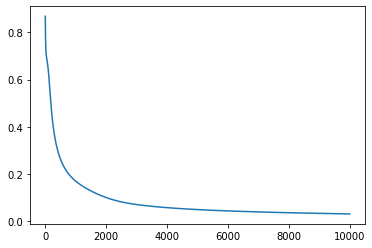

In [424]:
losses,params =grad_desc(X,Y,params,0.1,10000)
plt.plot(losses)
plt.show()

## 5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [369]:
def grad_step_mome(X,Y,params,alpha, epsilon,v):
  with tf.GradientTape() as tape:
        y_hat = ff_nn_new(X,params)
        f = loss(Y,y_hat)
  grads = tape.gradient(f,params)
  for var,grad,a in zip(params,grads,v):
        a=alpha*a + epsilon*grad
        var.assign(var - a)
  return f

In [370]:
def grad_desc_mome(X,Y,params,alpha, epsilon,n_iters):
    X = tf.Variable(X.T)
    Y = tf.Variable(Y)
    W = tf.random.uniform((4, 2), minval=-1, maxval=1)
    B = tf.random.uniform((4, 1), minval=-1, maxval=1)
    V = tf.random.uniform((1, 4), minval=-1, maxval=1)
    C = tf.random.uniform((1,), minval=-1, maxval=1)
    params = [tf.Variable(p) for p in [W,B,V,C]]
    losses = []
    v=tf.zeros(17)
    for i in range(n_iters):
        losses.append(grad_step_mome(X,Y,params,alpha, epsilon,v))  
    return losses,params

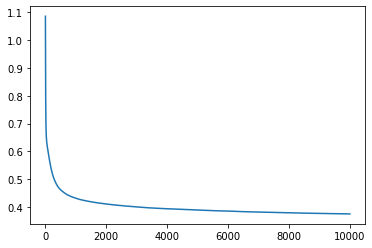

In [418]:
losses,params =grad_desc_mome(X,Y,params,0.9,0.1,10000)
plt.plot(losses)
plt.show()

In [426]:
## when the learning rate are the same, the original Gradient Descent method has a better performance.

## 6. Plot a visualization of the final decision boundary that your model has learned. Overlay the datapoints in this plot.


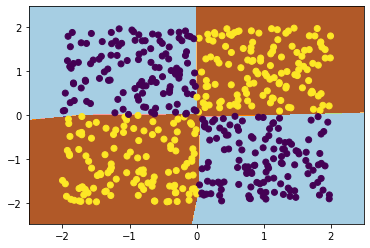

In [425]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
inp = np.c_[xx.ravel(), yy.ravel()]
y_hat = ff_nn_new(tf.Variable(inp.T,dtype='float32'),params)
z=y_hat.numpy()
z= np.where(z >= 0.5, 1, 0)
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=Y)